In [145]:
# Import Libraries

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, FunctionTransformer, label_binarize, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, make_scorer, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc,roc_auc_score, silhouette_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import time

In [116]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/EthanRosehart/DS2_Assignments/refs/heads/main/Customer_Data.csv')

In [117]:
# Check data

df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Missing Values:</BR> 1 = CREDIT_LIMIT, </BR>
313 = MINIMUM_PAYMENTS

# Data Cleaning - Missing Values

In [119]:
# Credit Limit we should be able to Impute as it is only 1 value, and this is a value that the bank would generate based on customer characteristics

df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [120]:
df['CREDIT_LIMIT'].value_counts()

CREDIT_LIMIT
3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: count, Length: 205, dtype: int64

In [121]:
df[df['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [122]:
# Assuming df is the DataFrame you're working with

# Step 1: Drop 'CUST_ID' and rows where 'MINIMUM_PAYMENTS' is missing, since we need those rows to predict 'CREDIT_LIMIT'
df_clean = df.drop(columns=['CUST_ID']).dropna(subset=['MINIMUM_PAYMENTS'])

# Step 2: Prepare the feature set (X) and target (y)
X = df_clean.drop(columns=['CREDIT_LIMIT'])  # Drop 'CREDIT_LIMIT' (what we are predicting)
y = df_clean['CREDIT_LIMIT']  # Target is 'CREDIT_LIMIT'

# Step 3: Train the XGBoost model on rows where 'CREDIT_LIMIT' is not missing
X_train = X[~y.isna()]
y_train = y[~y.isna()]
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Predict the missing 'CREDIT_LIMIT' value
X_missing = df.loc[df['CREDIT_LIMIT'].isna(), X.columns]  # Features for the row where 'CREDIT_LIMIT' is missing
y_missing_pred = xgb_model.predict(X_missing)

# Step 5: Replace only the missing 'CREDIT_LIMIT' with the predicted value, leave other columns unchanged
df.loc[df['CREDIT_LIMIT'].isna(), 'CREDIT_LIMIT'] = y_missing_pred

# Step 6: Evaluate the model on the available data
y_pred_train = xgb_model.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))  # Calculate RMSE

# Output the model's performance report
print(f"Training R²: {train_r2:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")

# Output the updated DataFrame (only the affected row)
print("\nPredicted missing CREDIT_LIMIT value:")
print(df[df['CREDIT_LIMIT'] == y_missing_pred[0]])  # Show the row with the predicted value

Training R²: 0.87
Training RMSE: 1301.95

Predicted missing CREDIT_LIMIT value:
     CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0   1360.231567   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6  


Missing Payments: Hypothesis - Where Purchases == 0, we can set minimum_payments to 0 (they can't pay if they haven't bought anything on the card)

In [123]:
# Filter rows where 'MINIMUM_PAYMENTS' is missing
missing_min_payments = df[df['MINIMUM_PAYMENTS'].isna()]

# Check if 'PURCHASES' is 0 for those rows
purchases_zero_in_missing_min_payments = (missing_min_payments['PURCHASES'] == 0)

# Count the number of rows where both 'MINIMUM_PAYMENTS' is NaN and 'PURCHASES' is 0
num_purchases_zero = purchases_zero_in_missing_min_payments.sum()

# Output the result
print(f"Number of rows where 'MINIMUM_PAYMENTS' is NaN and 'PURCHASES' is 0: {num_purchases_zero}")
print(f"Total rows with missing 'MINIMUM_PAYMENTS': {len(missing_min_payments)}")


Number of rows where 'MINIMUM_PAYMENTS' is NaN and 'PURCHASES' is 0: 76
Total rows with missing 'MINIMUM_PAYMENTS': 313


In [124]:
# Set 'MINIMUM_PAYMENTS' to 0 where 'PURCHASES' == 0 and 'MINIMUM_PAYMENTS' is NaN
df.loc[(df['PURCHASES'] == 0) & (df['MINIMUM_PAYMENTS'].isna()), 'MINIMUM_PAYMENTS'] = 0

# Verify the change
updated_rows = df[(df['PURCHASES'] == 0) & (df['MINIMUM_PAYMENTS'] == 0)]
print(f"Number of rows updated: {len(updated_rows)}")

Number of rows updated: 76


We realized here that some people have no purchases, but paid in Cash_Advance and those purchases did not count towards the total Purchases, we also realized here this Data must be fictional because there are way too many decimal places in these cash advance deposits

In [ ]:
# Filter rows where both 'PAYMENTS' and 'MINIMUM_PAYMENTS' are 0
payments_minimum_zero = df[(df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'] == 0)]

# Output the result
print(f"Number of rows where 'PAYMENTS' == 0 and 'MINIMUM_PAYMENTS' == 0: {len(payments_minimum_zero)}")
print(payments_minimum_zero)

In [125]:
# Filter rows where 'MINIMUM_PAYMENTS' is NaN and 'PAYMENTS' is 0
missing_min_payments_and_zero_payments = df[(df['MINIMUM_PAYMENTS'].isna()) & (df['PAYMENTS'] == 0)]

# Output the result
print(f"Number of rows where 'MINIMUM_PAYMENTS' is NaN and 'PAYMENTS' is 0: {len(missing_min_payments_and_zero_payments)}")
print(missing_min_payments_and_zero_payments)

Number of rows where 'MINIMUM_PAYMENTS' is NaN and 'PAYMENTS' is 0: 172
     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
56    C10058  3625.218146           1.000000     313.27            313.27   
63    C10065     7.152356           0.090909     840.00            840.00   
...      ...          ...                ...        ...               ...   
8838  C19079  2677.842539           1.000000     149.80            149.80   
8854  C19095     3.833185           0.125000      45.00             45.00   
8919  C19160    14.524779           0.333333     152.00            152.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   

   

In [126]:
df[df['MINIMUM_PAYMENTS'] == 0].value_counts()

CUST_ID  BALANCE      BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
C10049   3910.111237  1.000000           0.0        0.0               0.0                     1980.873201   0.0                  0.0                         0.0                               0.500000                7                 0              4200.0        0.0       0.0               0.0               12        1
C16182   37.324758    0.166667           0.0        0.0               0.0                     720.142017    0.0                  0.0                         0.0                               0.166667                6                 0              4000.0        0.0       0.0               0.0               6         1
C16771   25.998899    0.111111           0.0 

There are no MINIMUM PAYMENTS of 0 except the ones we set to 0, therefore at this point we've decided to set all the Null values to 0 as they did not make any minimum payment so 0 is sufficient to classify these customers

In [128]:
# Set all 'MINIMUM_PAYMENTS' values that are NaN to 0
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Exploratory Data Analysis

In [135]:
# Check Feature Variance - Features with little variance might not contribute much to clustering

variance = df.drop(columns=['CUST_ID']).var()
print(variance)

BALANCE                             4.332775e+06
BALANCE_FREQUENCY                   5.612351e-02
PURCHASES                           4.565208e+06
ONEOFF_PURCHASES                    2.755228e+06
INSTALLMENTS_PURCHASES              8.178274e+05
CASH_ADVANCE                        4.398096e+06
PURCHASES_FREQUENCY                 1.610985e-01
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
CASH_ADVANCE_FREQUENCY              4.004857e-02
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
CREDIT_LIMIT                        1.324060e+07
PAYMENTS                            8.381394e+06
MINIMUM_PAYMENTS                    5.456849e+06
PRC_FULL_PAYMENT                    8.555578e-02
TENURE                              1.791129e+00
dtype: float64


Identified Very Low Feature Variance for:<br>
BALANCE_FREQUENCY<br>
PURCHASES_FREQUENCY<br>
ONEOFF_PURCHASES_FREQUENCY<br>
PURCHASES_INSTALLMENTS_FREQUENCY<br>
CASH_ADVANCE_FREQUENCY<br>
PRC_FULL_PAYMENT<br>

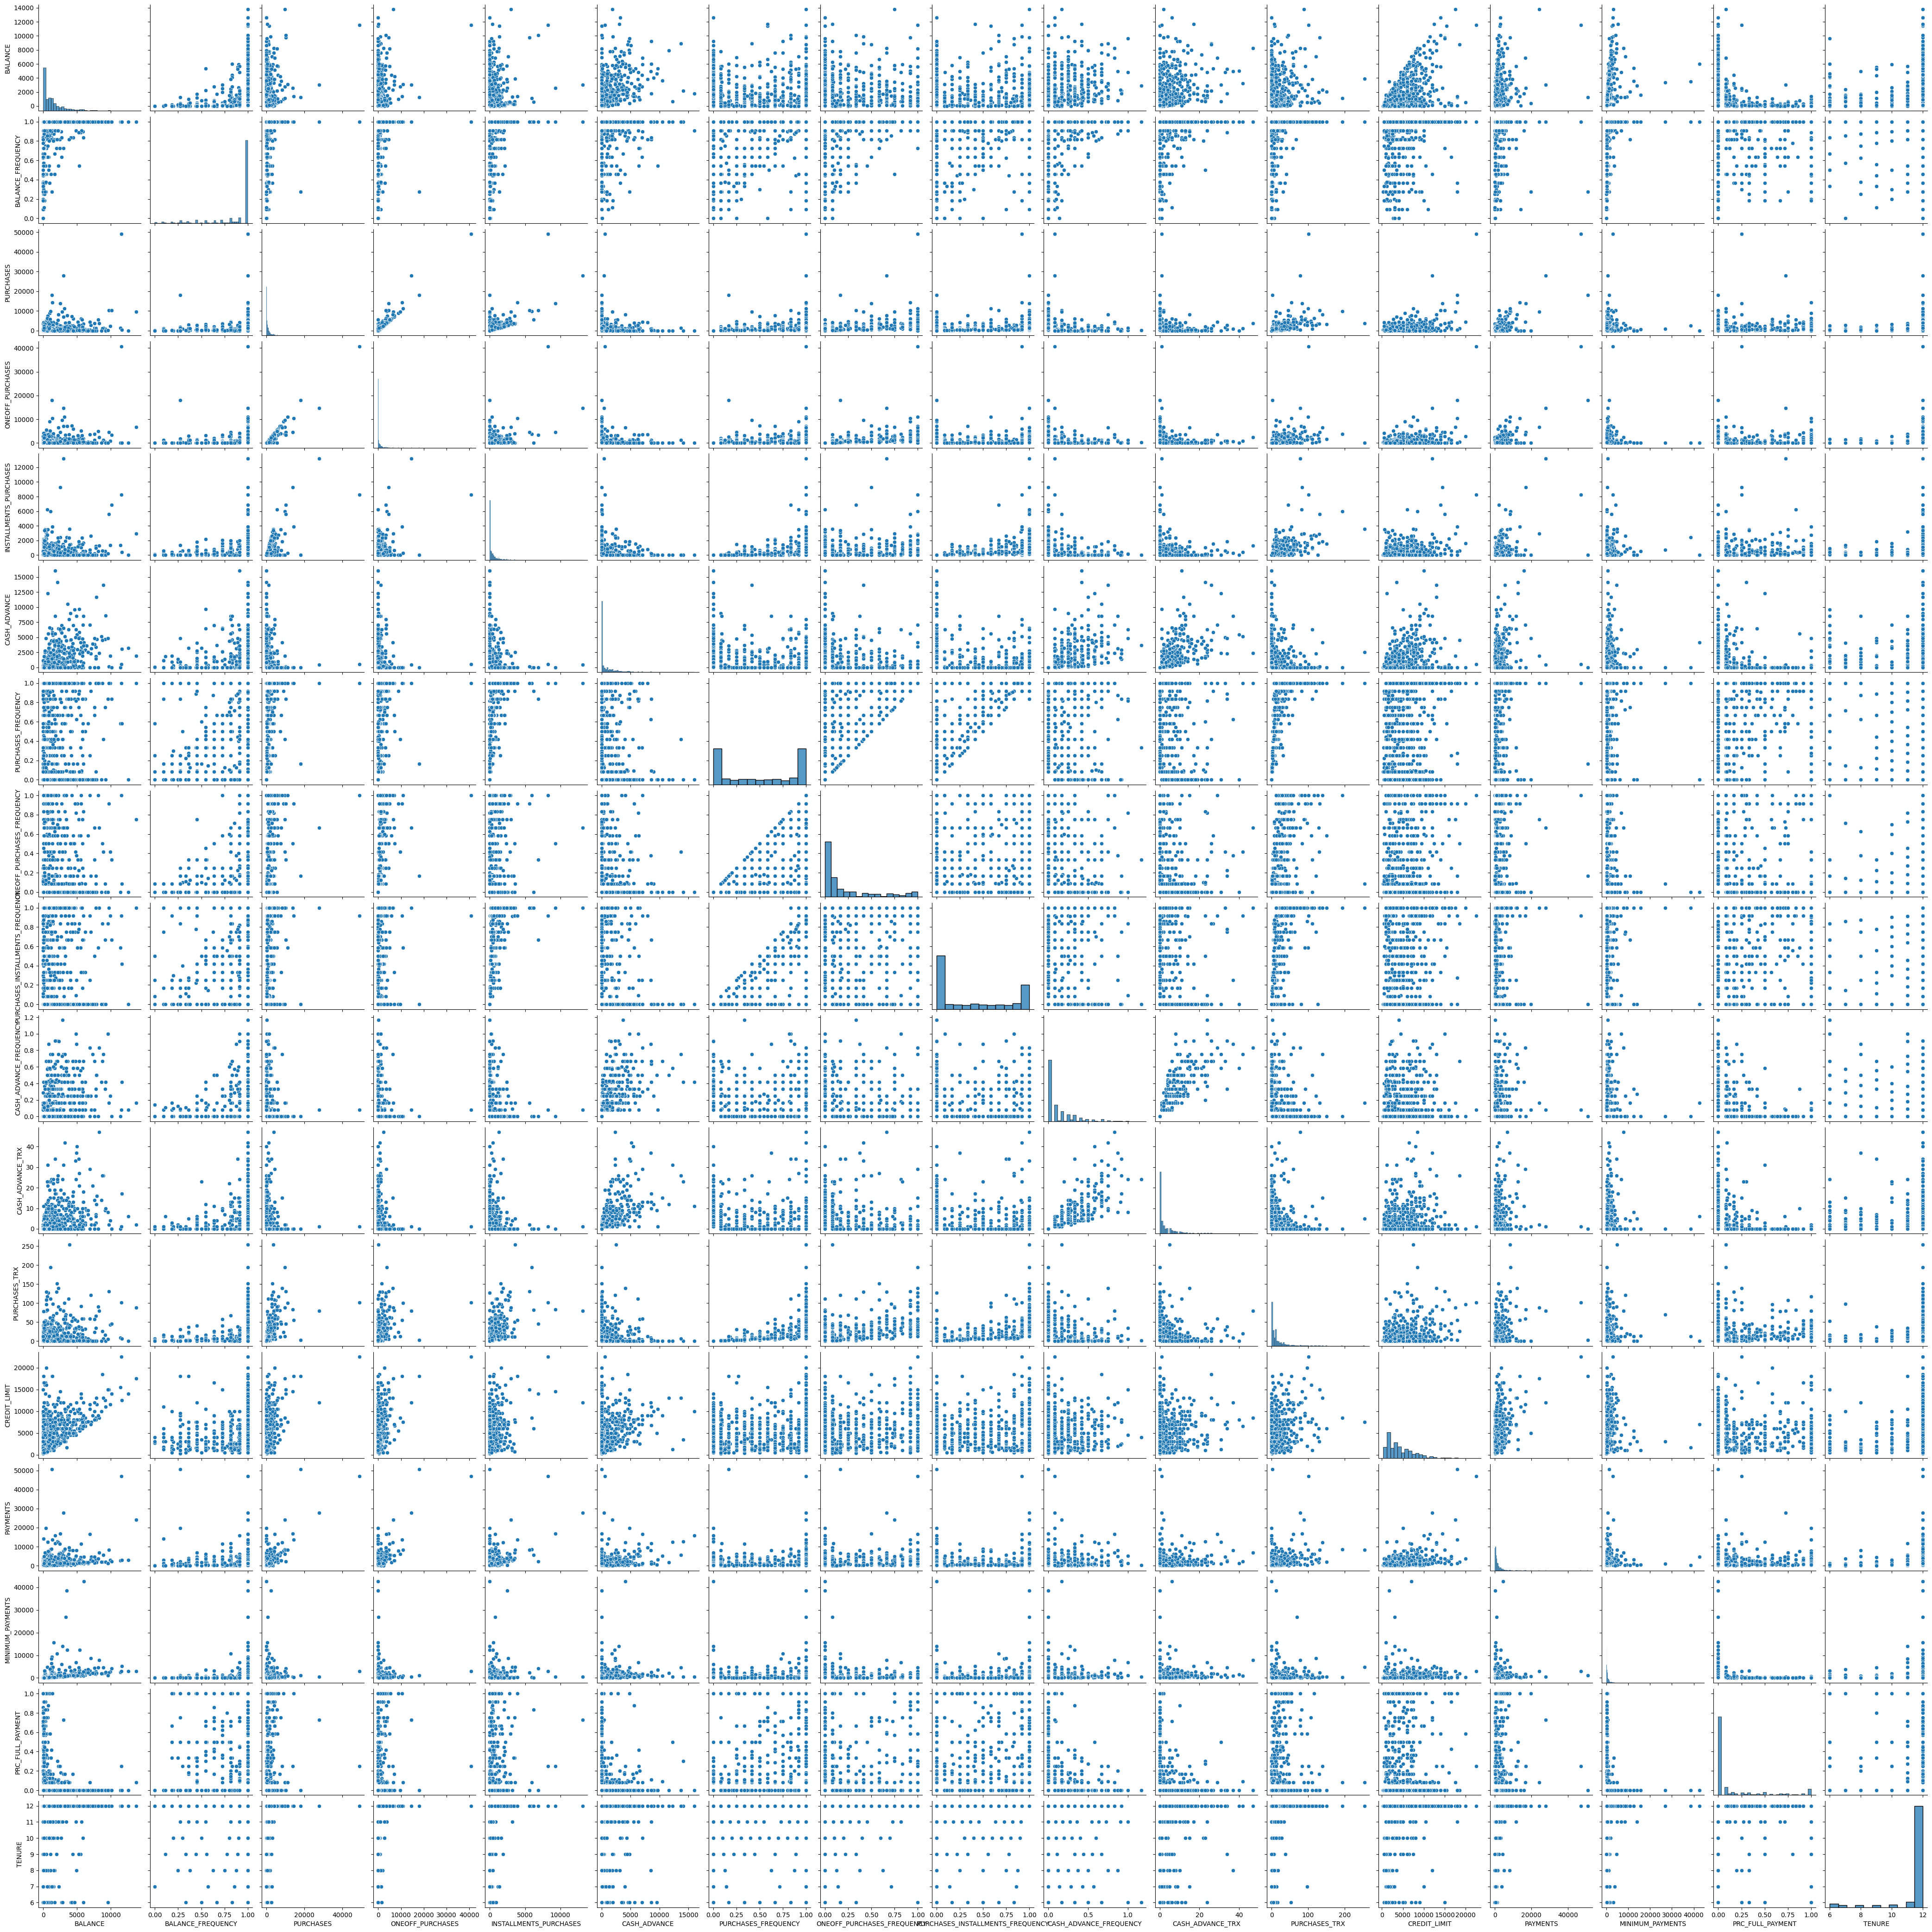

In [133]:
# Pair Plot of all the features - too much data - only using random 10%

# Taking a sample of the dataset for the pair plot
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data
sns.pairplot(df_sample.drop(columns=['CUST_ID']))
plt.show()

Key Insights:<br>

Linear Relationships:<br>

BALANCE vs. CREDIT_LIMIT: There seems to be a somewhat linear relationship between BALANCE and CREDIT_LIMIT. This is expected as customers with higher credit limits tend to maintain higher balances.<br>
PURCHASES vs. CREDIT_LIMIT: Similarly, there appears to be a positive trend between PURCHASES and CREDIT_LIMIT. This suggests that customers with higher limits may spend more, which could be relevant for clustering groups based on spending patterns.<br>
Sparse Data:<br>

ONEOFF_PURCHASES and CASH_ADVANCE: For many combinations involving ONEOFF_PURCHASES and CASH_ADVANCE, the data looks quite sparse, with a lot of zero values. This could affect clustering if the majority of customers don’t make one-off purchases or cash advances.<br>
PRC_FULL_PAYMENT: There are a lot of customers with PRC_FULL_PAYMENT close to 0, indicating that many customers might not pay off their balance in full. This is likely relevant for customer segmentation.<br>
Outliers:<br>

There are potential outliers in many features, especially in BALANCE, CASH_ADVANCE, and PURCHASES. These outliers could significantly impact the clustering algorithm, especially distance-based methods like KMeans. It might be worth handling these outliers (by either removing or scaling them) before clustering.<br>
Feature Overlap:<br>

PURCHASES_FREQUENCY vs. PURCHASES_INSTALLMENTS_FREQUENCY: There seems to be a clear relationship between general PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. Including both of these in the clustering may be redundant, as they are highly related.<br>
CASH_ADVANCE vs. CASH_ADVANCE_FREQUENCY: There is also an obvious correlation between how much cash advance is taken and how frequently it is used. Similar to the previous point, you might consider using one of these in the clustering rather than both.<br>

Actionable Steps for Clustering:<br>

Feature Scaling:<br>

Features like BALANCE, CREDIT_LIMIT, and PURCHASES are on different scales. Scaling them (e.g., using StandardScaler or MinMaxScaler) will help prevent one feature from dominating the clustering process.<br>
Outlier Detection/Handling:<br>

Since there are visible outliers in several features, it may be beneficial to address them. You can remove or clip extreme values, or apply a robust scaling method to minimize their impact.<br>
Feature Selection:<br>

You may want to remove redundant features like one of the PURCHASES_FREQUENCY or CASH_ADVANCE_FREQUENCY columns to avoid biasing the clustering. Correlated features can distort the distance calculations in algorithms like KMeans.<br>
Clustering on Spending Habits:<br>

Given the relationships between BALANCE, PURCHASES, and CREDIT_LIMIT, you could cluster customers based on their spending patterns. These features are likely to capture important differences between high-spending and low-spending customers.<br>

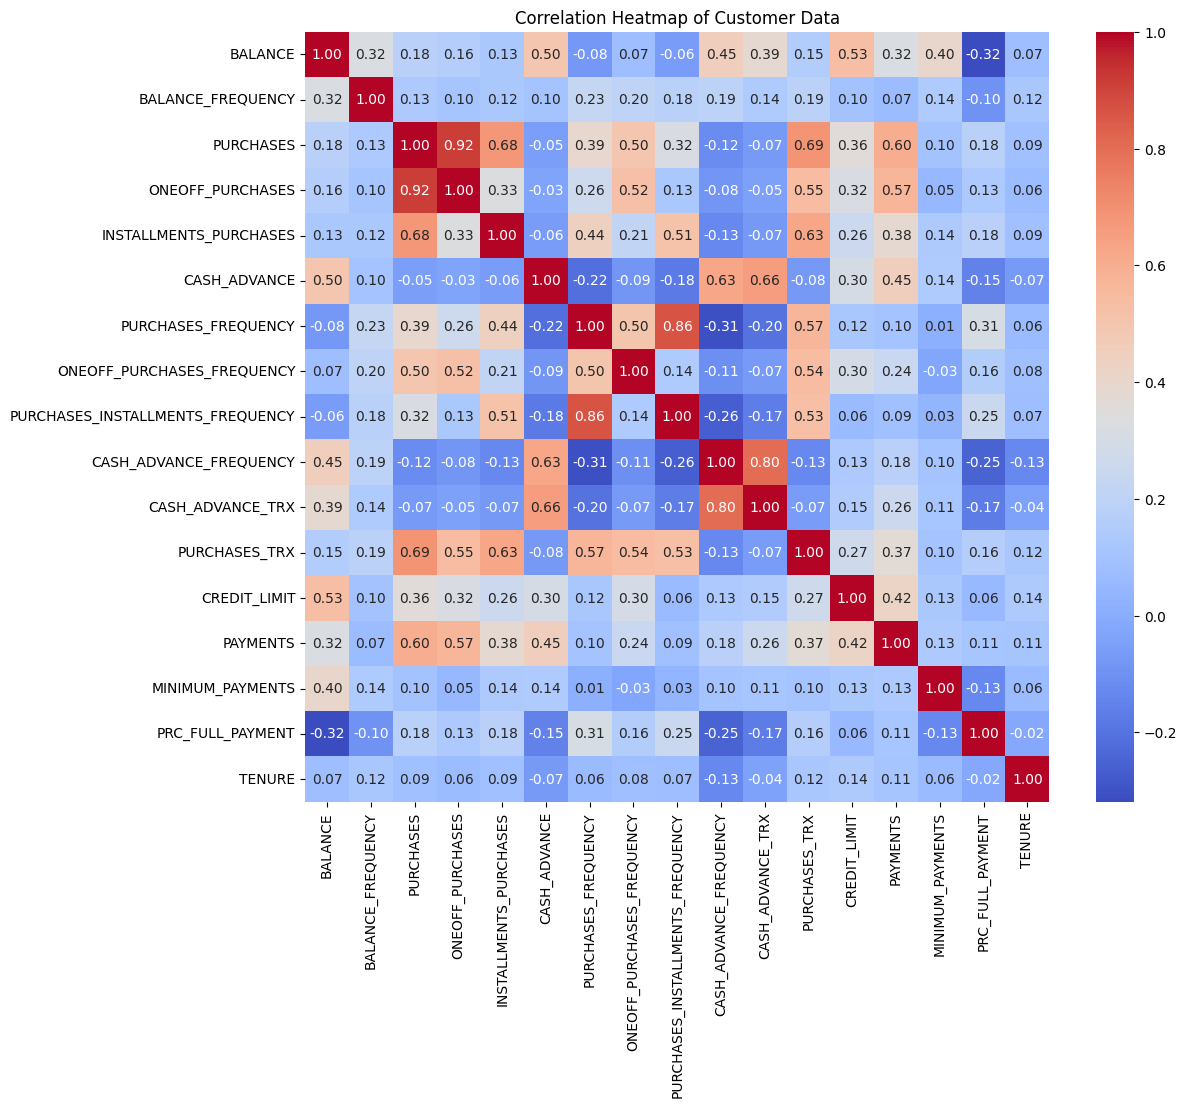

In [131]:
# Checking for Multi-Collinearity - as it can skew distance-based methods like K-Means

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Customer Data")
plt.show()

Key Insights from the Correlation Heatmap:<br>
<br>
1. Strong Positive Correlations:<br>
PURCHASES and ONEOFF_PURCHASES: The correlation between PURCHASES and ONEOFF_PURCHASES is very strong (0.92). This indicates that customers who make large purchases tend to have a large portion of them as one-off purchases.<br>
PURCHASES and INSTALLMENTS_PURCHASES: A strong correlation (0.68) exists between these two, suggesting that customers who make purchases in installments tend to have larger total purchase amounts.<br>
PURCHASES and CREDIT_LIMIT: There's a moderate positive correlation (0.60) between PURCHASES and CREDIT_LIMIT. Customers with higher credit limits tend to spend more, which makes sense from a consumer credit behavior perspective.<br>
PURCHASES_TRX and PURCHASES: The number of transactions (PURCHASES_TRX) is strongly correlated with the total PURCHASES (0.69). This indicates that higher total purchases are usually driven by more frequent transactions.<br>
CASH_ADVANCE and CASH_ADVANCE_TRX: The correlation between these two is very high (0.66), indicating that frequent cash advances translate into higher total cash advance amounts.<br>
<br>
2. Strong Negative Correlations:<br>
PRC_FULL_PAYMENT vs. BALANCE: A moderate negative correlation (-0.32) between PRC_FULL_PAYMENT and BALANCE indicates that customers who frequently pay off their balance in full tend to have lower balances.<br>
PRC_FULL_PAYMENT vs. CASH_ADVANCE_FREQUENCY: A negative correlation (-0.31) suggests that customers who frequently pay off their full balance are less likely to use cash advances.<br>
<br>
3. Features with Low Correlation:<br>
BALANCE_FREQUENCY: This feature does not show strong correlations with any other feature. It might not provide significant value in clustering as it has limited differentiation between customer behaviors.<br>
TENURE: The correlation of TENURE with other features is generally very low. This suggests that the duration of a customer's tenure doesn't have a strong direct impact on other behavioral features, which may make it less useful for clustering.<br>
<br>
4. Possible Redundancies:<br>
PURCHASES_FREQUENCY vs. PURCHASES_INSTALLMENTS_FREQUENCY: The strong correlation (0.86) between these two features suggests that they may provide similar information, so you might consider dropping one of them or combining them into a single feature.<br>
ONEOFF_PURCHASES_FREQUENCY and ONEOFF_PURCHASES: The correlation (0.52) between the two suggests that customers who frequently make one-off purchases also tend to spend larger amounts on them. You might not need both features for clustering since they convey similar information.<br>
<br>
<br>
Actionable Insights for Clustering:<br>

1. Feature Selection:<br>
Consider removing or combining highly correlated features like PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY as well as CASH_ADVANCE and CASH_ADVANCE_TRX. These features provide overlapping information and may not add significant value when considered together.<br>
<br>
2. Use PRC_FULL_PAYMENT:<br>
The negative correlation between PRC_FULL_PAYMENT and other features like BALANCE and CASH_ADVANCE_FREQUENCY indicates that this feature could help differentiate customers who manage their accounts responsibly (paying off balances) from those who may carry higher balances or use cash advances.<br>
<br>
3. Focus on Spending Behavior:<br>
Since features like PURCHASES, CREDIT_LIMIT, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES show strong relationships, these could be the key drivers in clustering. Clusters may emerge based on how much customers spend, how frequently they spend, and whether they use credit or cash advances.<br>
<br>
4. Handle Features with Low Correlation:<br>

Features like TENURE and BALANCE_FREQUENCY don't have strong correlations with other features, meaning they might not contribute much to the clustering process. You can consider either removing them or testing their impact on the clustering process.<br>

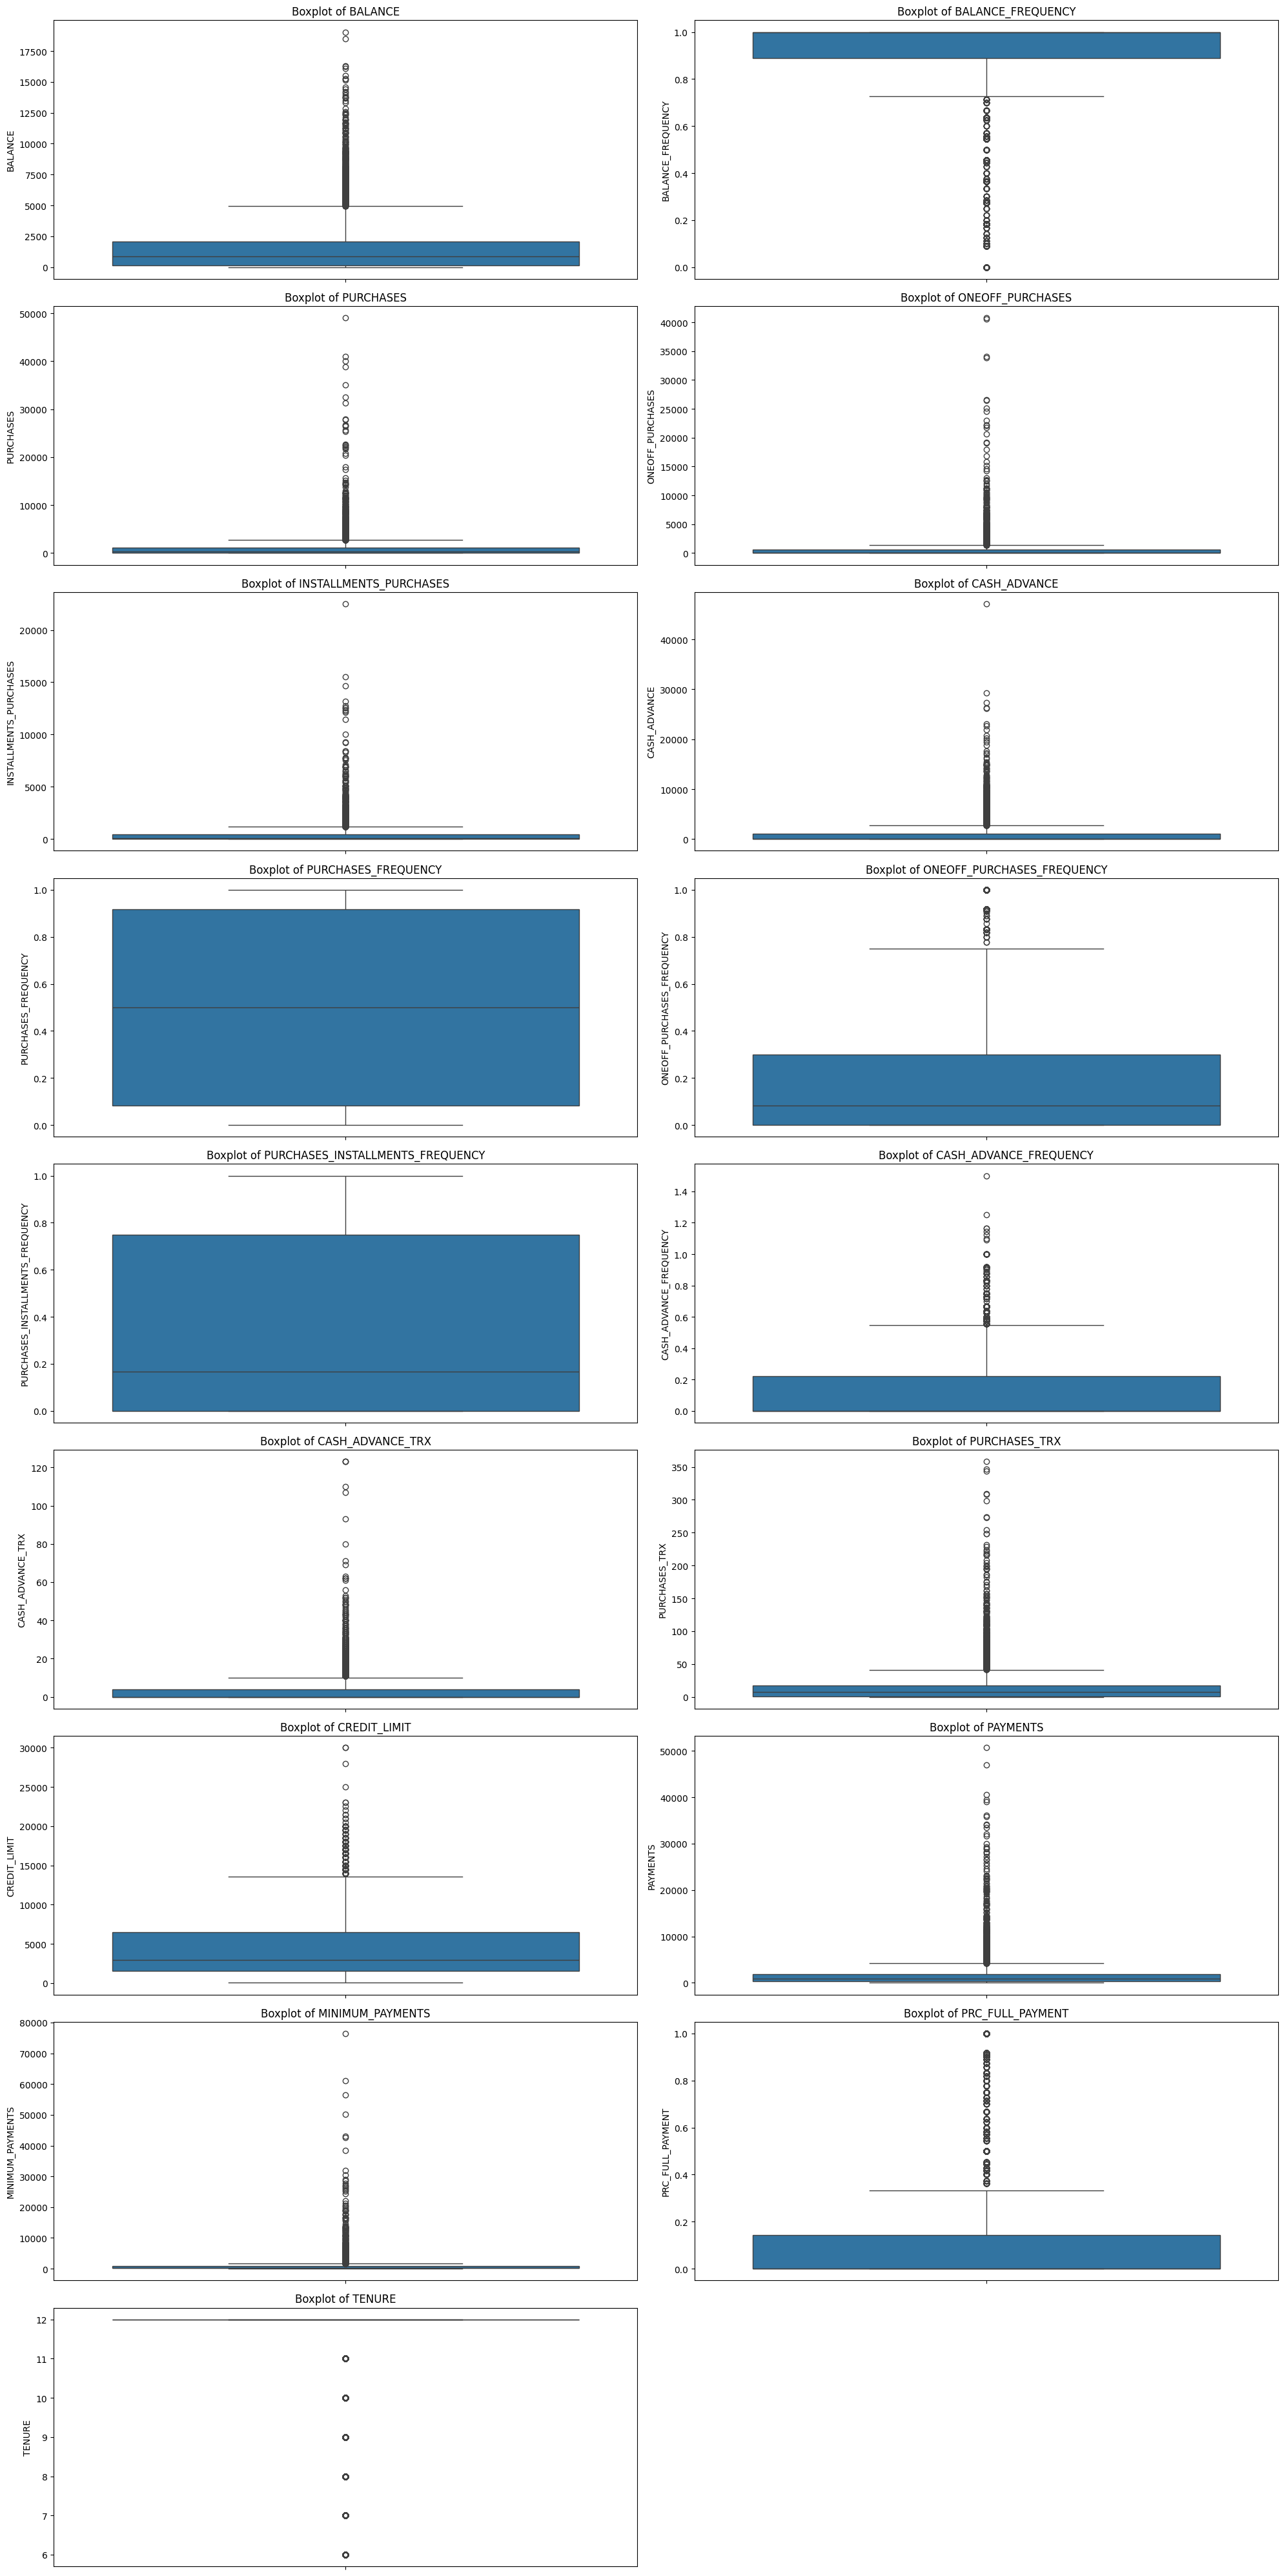

In [137]:
# Create boxplots for all numerical columns except 'CUST_ID'
numeric_columns = df.drop(columns=['CUST_ID']).select_dtypes(include=['float64', 'int64']).columns

# Generate vertical boxplots for each numeric column
plt.figure(figsize=(20, 40))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//2 + 1, 2, i)  # Create subplots
    sns.boxplot(data=df, y=column)  # Change x=column to y=column for vertical boxplots
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Key Insights:<br>

Outliers:<br>

Almost all the columns, such as BALANCE, PURCHASES, ONEOFF_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, MINIMUM_PAYMENTS, and PAYMENTS, show a significant number of outliers.<br>
These outliers can negatively impact distance-based clustering algorithms like KMeans because they will pull the centroids toward these extreme values.<br> Action: Consider handling these outliers by:<br>
Capping/extreme value clipping: Limit extreme values to a defined percentile (e.g., 99th percentile).<br>
Log Transformation: Apply log transformation to reduce the effect of skewness and extreme values.<br>
Robust scaling: Use robust scaling to reduce the effect of extreme values.<br>
<br>
Skewness:<br>

Many columns, such as BALANCE, PURCHASES, CASH_ADVANCE, MINIMUM_PAYMENTS, and PAYMENTS, are heavily skewed to the right. This suggests that most customers have relatively low values in these features, but a small number have very high values.<br>
Clustering algorithms could be biased toward these higher-value customers.<br> Action: Apply log transformation to these skewed features to normalize the distribution and make clustering more effective.<br>
Low Variance in Frequency Columns:<br>

Columns like BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY have limited variance. These features are almost uniformly distributed, and they may not contribute significantly to clustering.<br> Action: You might want to consider dropping one or more of these frequency-related columns, especially if they do not differentiate between customers enough.<br>
<br>
TENURE:<br>

The TENURE boxplot suggests that there might not be much variance in this column, with most customers falling into the same few values. This could reduce the feature's usefulness in differentiating between clusters.<br> Action: Consider removing or keeping it depending on how relevant it seems for customer segmentation. You could also treat this as an ordinal variable, depending on its meaning in your dataset.<br>


# Clustering - Test Run without Any Changes from EDA

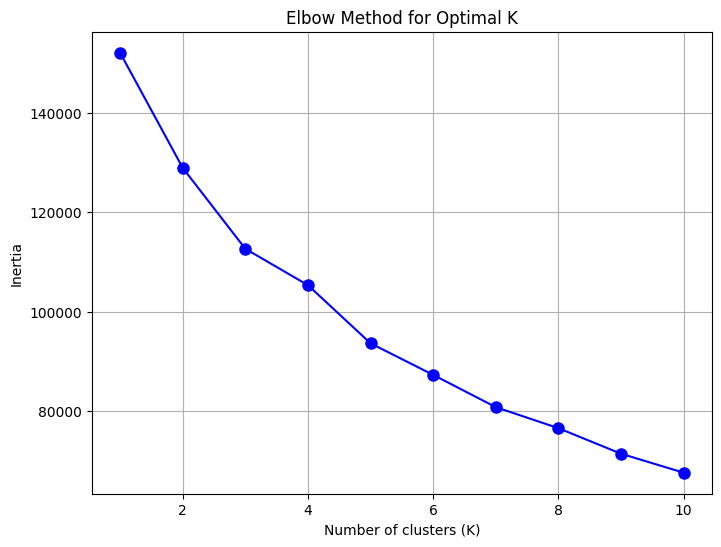

In [140]:
# Find the optimal number of clusters for K Means Clustering using the Elbow Method

# Step 1: Select the numerical columns and scale the data
numeric_columns = df.drop(columns=['CUST_ID']).select_dtypes(include=['float64', 'int64']).columns

# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])

# Step 2: Run KMeans for different values of K and calculate inertia
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances to nearest cluster center)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

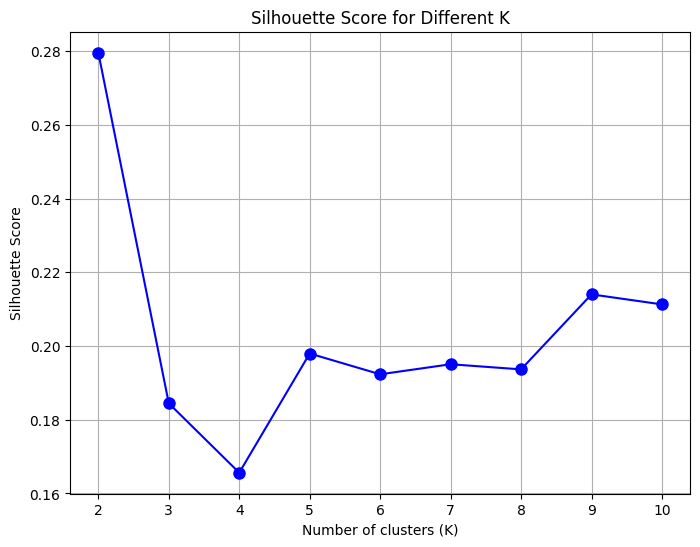

In [143]:
# Try finding optimal number of clusters using Silhouette Score - as Elbow Method is unclear

# Step 1: Calculate the silhouette score for each K
silhouette_scores = []

K_range = range(2, 11)  # Silhouette score is undefined for K=1

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Step 2: Plot the silhouette score
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.grid(True)
plt.show()

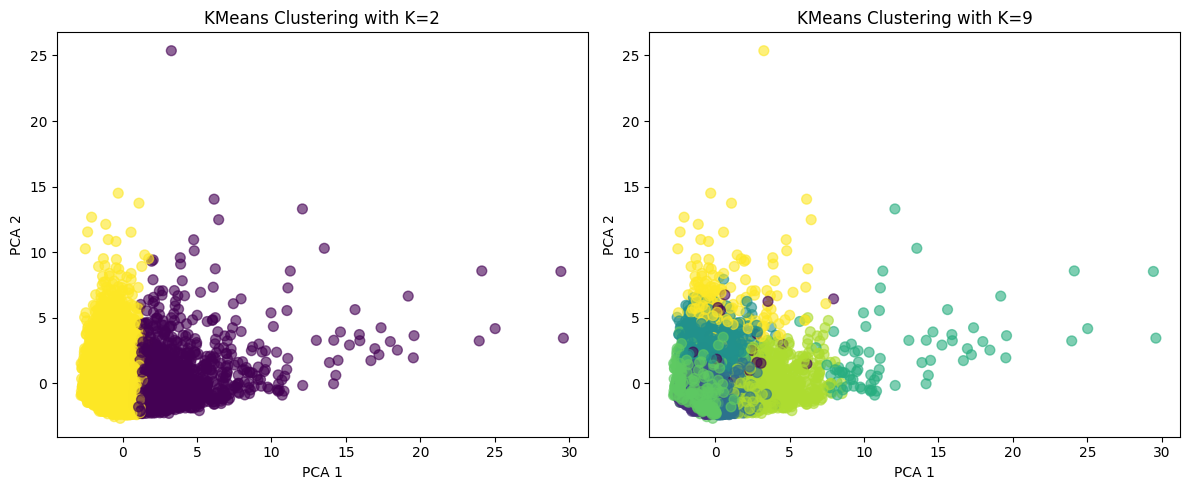

In [147]:
# Drop the CUST_ID column before clustering
df_no_id = df.drop(columns=['CUST_ID'])

# Step 1: Scale the data excluding CUST_ID
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_id)

# Step 2: Fit KMeans for K=2 and K=9
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_9 = KMeans(n_clusters=9, random_state=42)

# Fit the model on the scaled data
kmeans_2_labels = kmeans_2.fit_predict(df_scaled)
kmeans_9_labels = kmeans_9.fit_predict(df_scaled)

# Step 3: Use PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Step 4: Plot K=2 clusters
plt.figure(figsize=(12, 5))

# Plot for K=2
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_2_labels, cmap='viridis', s=50, alpha=0.6)
plt.title("KMeans Clustering with K=2")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Plot for K=9
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_9_labels, cmap='viridis', s=50, alpha=0.6)
plt.title("KMeans Clustering with K=9")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

# Ok obviously we need to go back and feature select and scale but this was fun, good night!